In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
binder_original = pd.read_csv('./binder_original.csv', index_col=0)
binder_multinomial = pd.read_csv('./binder_multinomial.csv', index_col=0)
binder_wm = pd.read_csv('./binder_wm.csv', index_col=0)

In [3]:
df1 = pd.DataFrame({'task': 'binder design',
                    'type': ['argmax']*500+['multinomial']*500+['watermarked']*500,
                    'best pLDDT': np.concatenate((binder_original.groupby('sample')['pLDDT'].max().values,
                                                  binder_multinomial.groupby('sample')['pLDDT'].max().values,
                                                  binder_wm.groupby('sample')['pLDDT'].max().values))})

In [4]:
secstruct_original = pd.read_csv('./secondary_structure_original.csv', index_col=0)
secstruct_multinomial = pd.read_csv('./secondary_structure_multinomial.csv', index_col=0)
secstruct_wm = pd.read_csv('./secondary_structure_wm.csv', index_col=0)

In [5]:
df2 = pd.DataFrame({'task': 'second struct conditioned',
                    'type': ['argmax']*500+['multinomial']*500+['watermarked']*500,
                    'best pLDDT': np.concatenate((secstruct_original.groupby('sample')['pLDDT'].max().values,
                                                  secstruct_multinomial.groupby('sample')['pLDDT'].max().values,
                                                  secstruct_wm.groupby('sample')['pLDDT'].max().values))})

In [6]:
# data.to_csv('pg_wm_performance.csv')

In [7]:
data = pd.concat([df1, df2])

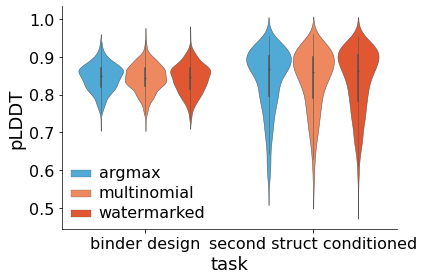

In [8]:
colormap = {'argmax':'#51A9D6',
            'multinomial':"#EE885F",
            'watermarked':'#E05732'}
fig, ax = plt.subplots(1, 1, figsize=(6, 4),  sharey=True)
sns.violinplot(data=data, x='task', y='best pLDDT', hue='type',
               palette=colormap, saturation=1, linewidth=0.5,
               orient='v',
               ax=ax)

ax.legend(title='')
legend = ax.legend(frameon=False)  # Remove legend border
plt.setp(legend.get_texts(), fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.7)
ax.spines['bottom'].set_linewidth(0.7)
ax.set_xlabel('task', fontsize=18)
ax.set_ylabel('pLDDT', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=90)

plt.tight_layout()
plt.savefig("protein_generator_watermark_performance.pdf", format='pdf')
plt.show()

In [10]:
binder_wm.groupby('sample')['pLDDT'].max().values.max()

0.959

In [11]:
binder_multinomial.groupby('sample')['pLDDT'].max().values.max()

0.9561

In [12]:
binder_original.groupby('sample')['pLDDT'].max().values.max()

0.9395

In [13]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

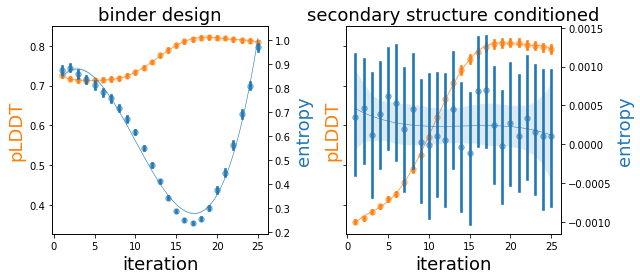

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(9, 4),  sharey=True)
sns.regplot(data=binder_wm, x='iteration', y='pLDDT', x_estimator=np.mean, 
            order=7,color=sns.color_palette()[1], ax=axes[0],
            line_kws={'linewidth': 0.5}, scatter_kws={'alpha':0.5, 's':30},
           )
axes[0].set_ylabel('pLDDT', color=sns.color_palette()[1], fontsize=18)
axes[0].set_xlabel('iteration', fontsize=18)
axes[0] = axes[0].twinx()
sns.regplot(data=binder_wm, x='iteration', y='entropy', 
            x_estimator=np.mean, order=3, color=sns.color_palette()[0],ax=axes[0],
            line_kws={'linewidth': 0.5}, scatter_kws={'alpha':0.5, 's':30})
axes[0].set_ylabel('entropy', color=sns.color_palette()[0], fontsize=18)
axes[0].set_title('binder design', fontsize=18)


sns.regplot(data=secstruct_wm, x='iteration', y='pLDDT', 
            x_estimator=np.mean, order=7,color=sns.color_palette()[1], ax=axes[1],
            line_kws={'linewidth': 0.5}, scatter_kws={'alpha':0.5, 's':30}
           )
axes[1].set_ylabel('pLDDT', color=sns.color_palette()[1], fontsize=18)
axes[1].set_xlabel('iteration', fontsize=18)
axes[1] = axes[1].twinx()
sns.regplot(data=secstruct_wm, x='iteration', y='watermark', 
            x_estimator=np.mean, order=3, color=sns.color_palette()[0],ax=axes[1],
            line_kws={'linewidth': 0.5}, scatter_kws={'alpha':0.5, 's':30})
axes[1].set_ylabel('entropy', color=sns.color_palette()[0], fontsize=18)
axes[1].set_title('secondary structure conditioned', fontsize=18)
plt.tight_layout()
# plt.savefig("protein_generator_entropy.pdf", format='pdf')
plt.show()
